<a href="https://colab.research.google.com/github/MohammadErfanRashidi/Sleep-and-Health/blob/main/Sleep_Health_and_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Required Libraries

In [128]:
!pip install seaborn==0.12.2

In [129]:
!pip install scikit-learn==1.3.0

In [130]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading and Analyzing the Dataset

In [131]:
# Uploading the dataset

dt = pd.read_csv("PathToYourFile.csv")  # Path to the file
dt_copy = dt.copy()

In [132]:
# Checking the data type

dt.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [133]:
# Checking the head

dt.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [134]:
# Checking the shape

dt.shape

(374, 13)

In [135]:
# Checking missing values

dt.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [136]:
# Describing the data

dt.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# X and Y

In [137]:
# Getting the Text columns

text_cols = ['Gender', 'Occupation', 'BMI Category']
X_text = dt[text_cols]

In [138]:
# Combining the texts

X_text = X_text.apply(lambda row: ' '.join(row.values.astype(str)), axis=1).values

In [139]:
# Selecting numerical columns except "Quality of Sleep"

numeric_cols = dt.columns[dt.columns != "Quality of Sleep"]
numeric_cols = dt.select_dtypes(include=np.number).columns
X_numeric = dt[numeric_cols].astype(str).values

In [140]:
# Combining text and numeric features

X = np.column_stack((X_text, X_numeric))

In [141]:
# Converting into a list

X = X.astype(str).tolist()

In [142]:
# Ensuring all elements are strings

new_X = []
for inner_list in X:
    str_list = [str(x) for x in inner_list]
    new_X.append(' '.join(str_list))

X = new_X

In [143]:
# Numerating the text

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [144]:
# Splitting "Sleep Disorder" column

Y = dt["Quality of Sleep"]

In [145]:
# Printing X and Y

print(X)
print(Y)

  (0, 400)	0.42066097348627535
  (0, 395)	0.15212493262765384
  (0, 390)	0.13289530247416384
  (0, 387)	0.21418105732304085
  (0, 361)	0.4383136285592727
  (0, 315)	0.46107185915015136
  (0, 314)	0.3450714533857384
  (0, 188)	0.46107185915015136
  (1, 392)	0.19932903748133082
  (1, 390)	0.2164492782089023
  (1, 386)	0.34147638356230464
  (1, 358)	0.29286338932312206
  (1, 338)	0.34147638356230464
  (1, 199)	0.6417858428345773
  (1, 2)	0.42725562705401066
  (2, 392)	0.19932903748133082
  (2, 390)	0.2164492782089023
  (2, 386)	0.34147638356230464
  (2, 358)	0.29286338932312206
  (2, 338)	0.34147638356230464
  (2, 199)	0.6417858428345773
  (2, 2)	0.42725562705401066
  (3, 397)	0.4369196227513814
  (3, 396)	0.4369196227513814
  (3, 394)	0.33951885524632935
  :	:
  (370, 304)	0.6691634762032695
  (371, 395)	0.20642179102450298
  (371, 393)	0.2815503698306194
  (371, 388)	0.1826126844136872
  (371, 358)	0.2439909484497466
  (371, 352)	0.29221748389815144
  (371, 348)	0.25361034386076897
  (3

# Train and Test

In [146]:
# Train and Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

# Modeling

In [147]:
# Creating the model

model = LogisticRegression()

In [148]:
# Fitting the model

model.fit(X_train, Y_train)

LogisticRegression()

# Evaluation

In [149]:
# Accuracy on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Printing the accuracy score of training data

print("Accuracy score of training data: ", training_data_accuracy)


Accuracy score of training data:  0.9565217391304348


In [150]:
# Accuracy on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

# Printing the accuracy score of test data

print("Accuracy score of test data: ", test_data_accuracy)

Accuracy score of test data:  0.92


# Visualization

In [151]:
# Convert categorical columns to numerical representations

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in dt.columns:
    if dt[column].dtype == type(object):
        dt[column] = le.fit_transform(dt[column])

<Axes: >

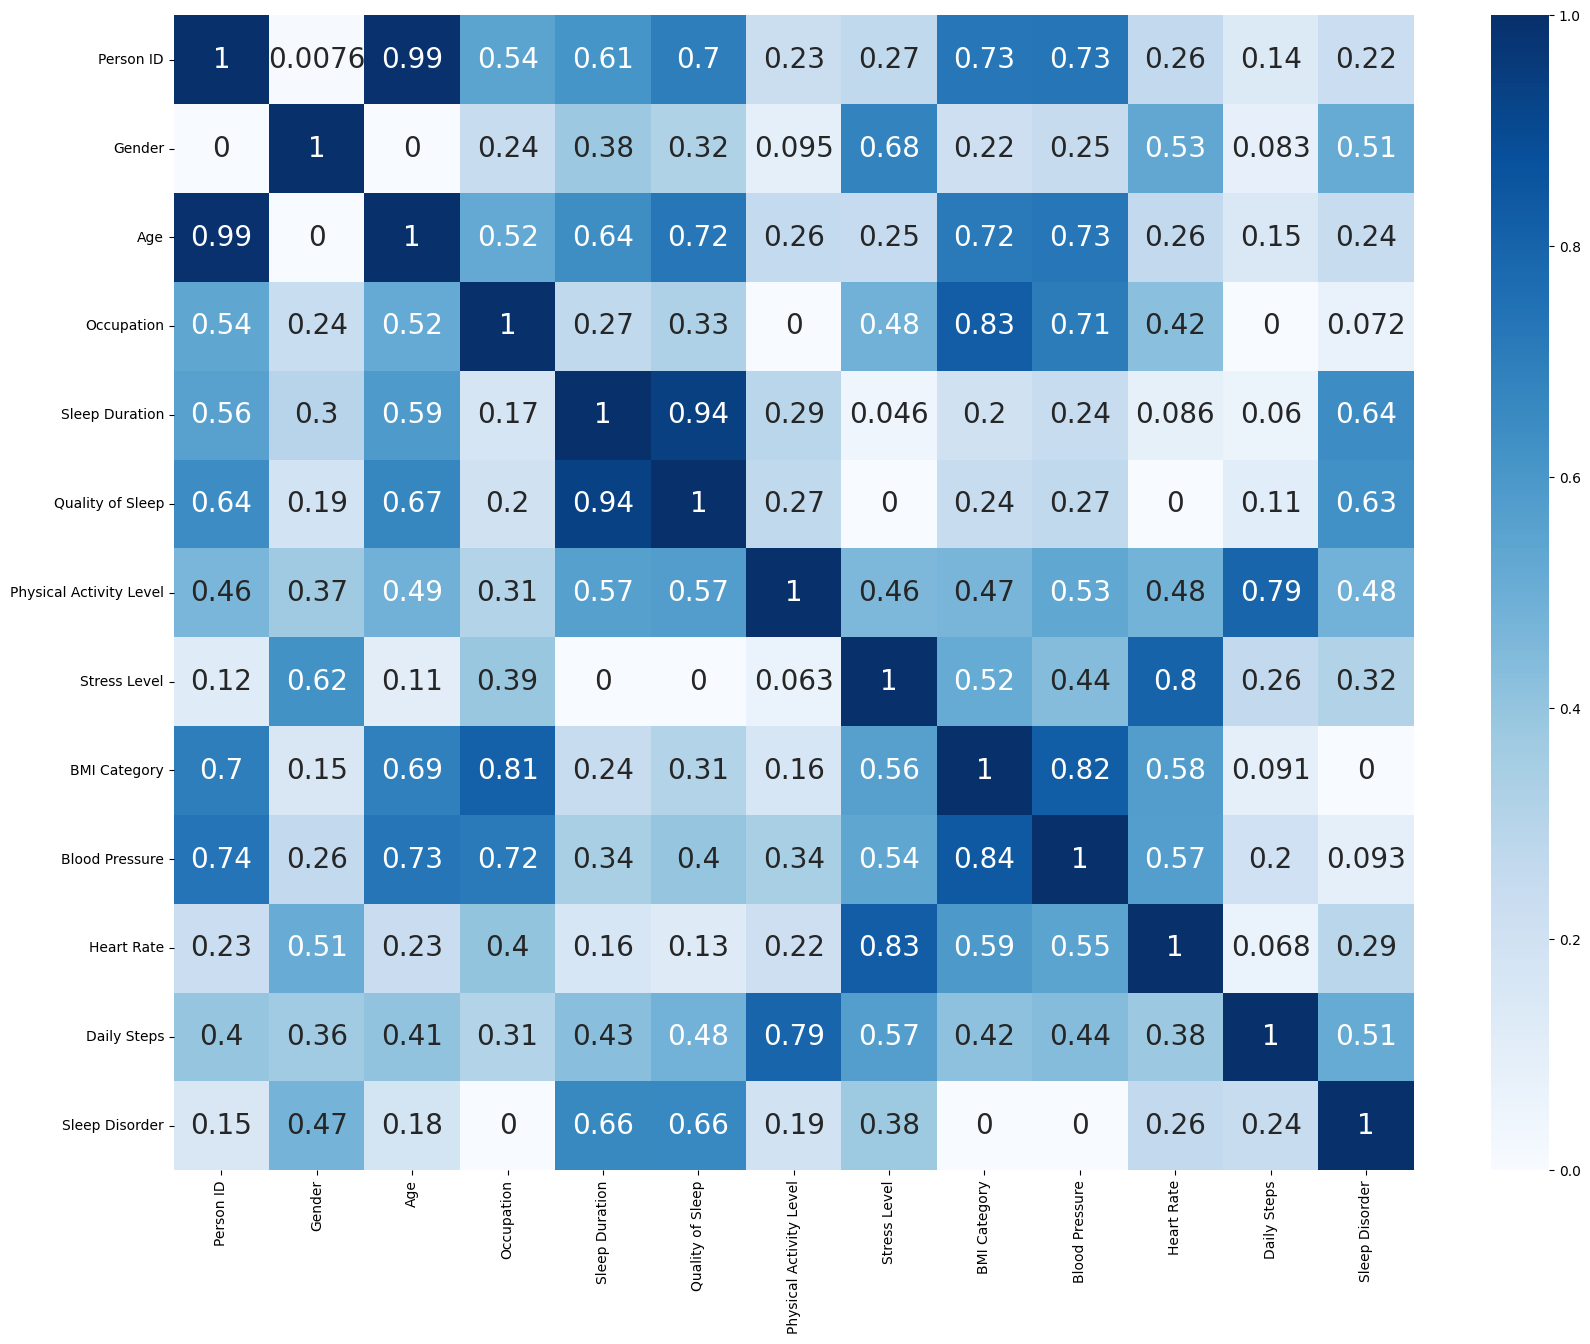

In [152]:
# Heatmap

correlation = dt.corr()
normalized_correlation = (correlation - correlation.min()) / (correlation.max() - correlation.min())

plt.figure(figsize=(20,15))
sns.heatmap(normalized_correlation, annot=True, cmap='Blues', annot_kws={"size": 20})

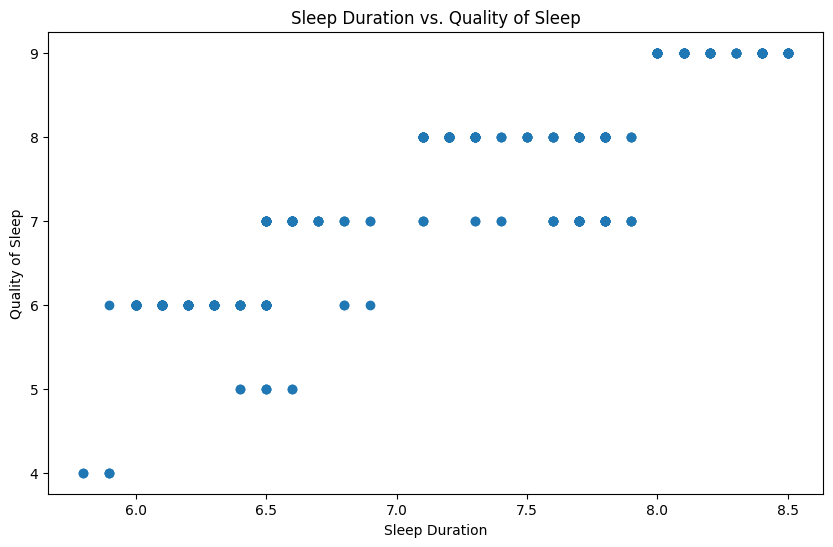

In [153]:
# Sleep duration and sleep quality plot

plt.figure(figsize=(10, 6))
plt.scatter(dt['Sleep Duration'], dt['Quality of Sleep'])
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

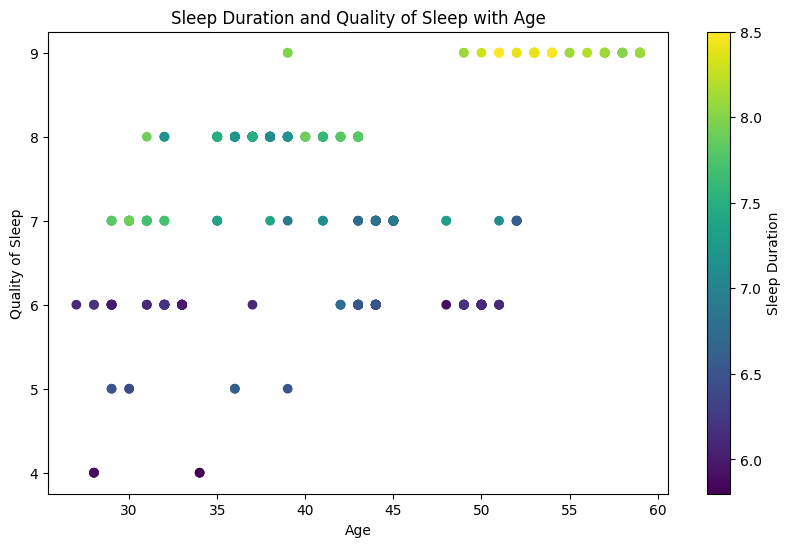

In [154]:
# Sleep duration and sleep quality with age

plt.figure(figsize=(10, 6))
plt.scatter(dt['Age'], dt['Quality of Sleep'], c=dt['Sleep Duration'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration and Quality of Sleep with Age')
plt.colorbar(label='Sleep Duration')
plt.show()


In [155]:
# Transforming the numerical values back to strings

le = LabelEncoder()
le.fit(dt_copy["Occupation"])
dt["Occupation"] = le.inverse_transform(dt["Occupation"])

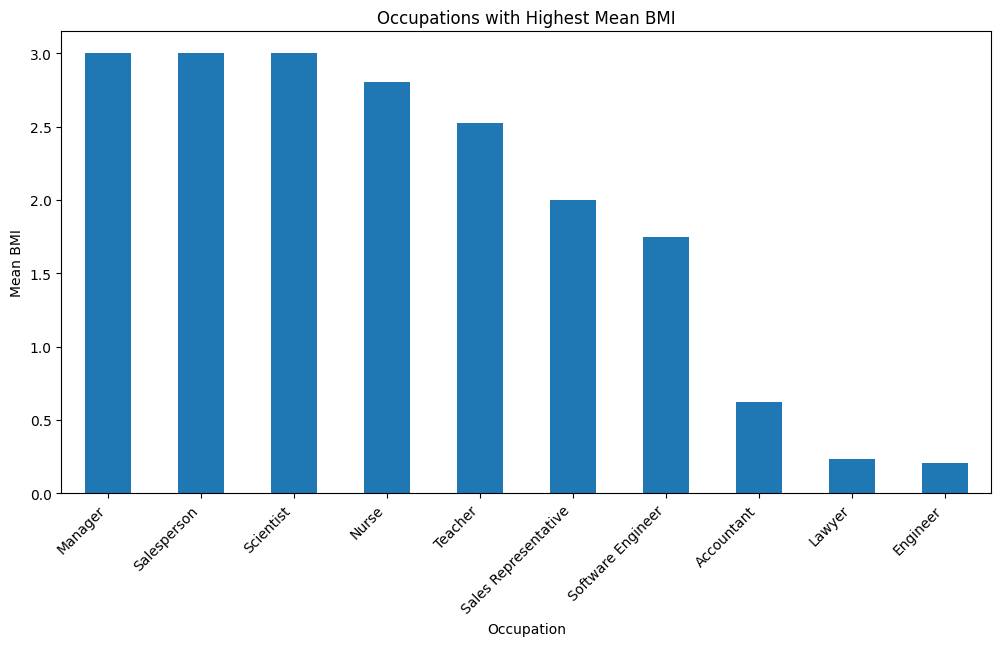

In [156]:
# Occupations with most MBIs

# Grouping by Occupation and calculate the mean BMI for each occupation
occupation_bmi = dt.groupby('Occupation')['BMI Category'].mean()

# Sorting the occupations by mean BMI in descending order
occupation_bmi_sorted = occupation_bmi.sort_values(ascending=False)

# Visualizing this data using a bar plot
plt.figure(figsize=(12, 6))
occupation_bmi_sorted.head(10).plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Mean BMI')
plt.title('Occupations with Highest Mean BMI')
plt.xticks(rotation=45, ha='right')
plt.show()

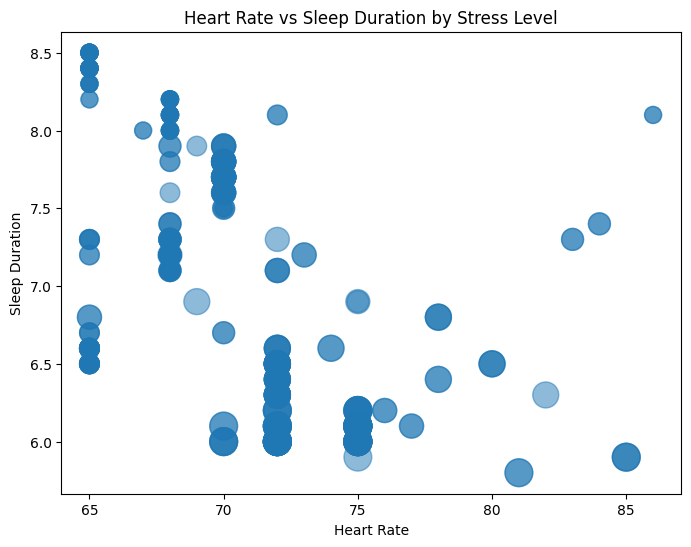

In [157]:
# Heart Rate vs Sleep Duration by Stress Level

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(dt['Heart Rate'], dt['Sleep Duration'], s=dt['Stress Level']*50, alpha=0.5)
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Duration')
_ = plt.title('Heart Rate vs Sleep Duration by Stress Level')